# Smart Cities, part 2: data cleaning visualisation with Python

## Smart Cities Index analysis and visualization with Python

Population in smart cities is growing, as well as Climate-related challenges. Smart cities are seen to become the new sustainable urban environment to tackle with these challenges with the help of digitalisation and big data analysis.

In this 2nd part of my project I am focusing on the Smart Cities Index dataset to inentify if the total Smart City Index has any of subindexes (areas of assesment and living) that contribute more to its value. The key goal is to identify priority areas for smart cities development.

[Check out the part 1 of the project here](https://www.kaggle.com/code/olgashevtsova/smart-cities-part-1-population-and-smi-raiting). 

**Data source:**
**Smart Cities Index dataset** taken from Kaggle database kindly provided by MAGDA MONTEIRO, link: https://www.kaggle.com/datasets/magdamonteiro/smart-cities-index-datasets
Data Collected from Different Types of IoT Devices.
The Leap Data team utilized globally-recognized indices (formalized for the evaluation of Smart City initiatives), and developed a data model to interpret how Calgary & Edmonton stand in relation to Global Leaders of Smart City activities. The indices utilized to create these insights were developed exclusively from Open Datasets.

**Hashtags:**
python, data cleaning, data exploration, vizualisation with Python.

**Topics:**
Smart cities, Smart Cities Index, python

In [1]:
# data analysis and wrangling
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import scipy
import math
import collections

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file=pd.read_csv('../input/smart-cities-index-datasets/Smart_City_index_headers.csv')
file.info()
file.isnull().sum() 
file.isna().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Id                                 102 non-null    int64 
 1   City                               102 non-null    object
 2   Country                            102 non-null    object
 3   Smart_Mobility                     102 non-null    int64 
 4   Smart_Environment                  102 non-null    int64 
 5   Smart_Government                   102 non-null    int64 
 6   Smart_Economy                      102 non-null    int64 
 7   Smart_People                       102 non-null    int64 
 8   Smart_Living                       102 non-null    int64 
 9   SmartCity_Index                    102 non-null    int64 
 10  SmartCity_Index_relative_Edmonton  102 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 8.9+ KB


Id                                   0
City                                 0
Country                              0
Smart_Mobility                       0
Smart_Environment                    0
Smart_Government                     0
Smart_Economy                        0
Smart_People                         0
Smart_Living                         0
SmartCity_Index                      0
SmartCity_Index_relative_Edmonton    0
dtype: int64

In [3]:
file.columns

Index(['Id', 'City', 'Country', 'Smart_Mobility ', 'Smart_Environment',
       'Smart_Government ', 'Smart_Economy ', 'Smart_People', 'Smart_Living',
       'SmartCity_Index', 'SmartCity_Index_relative_Edmonton'],
      dtype='object')

In [4]:
#Removed extra spaces, removed ID and the last column
file.replace(" ", "")
file.columns=file.columns.str.replace(' ', '')
sci=file.drop(columns='Id')
sci=sci.drop(columns='SmartCity_Index_relative_Edmonton', ).sort_values('SmartCity_Index', ascending=False)
sci_sorted_by_country=sci.set_index('Country').sort_index()
sci_sorted_by_country

,City,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index
Country,,,,,,,,
Australia,Sydney,6263,3890,5932,5075,7305,9620,6442
Australia,Melbourne,7230,3906,5848,2780,5188,9620,6061
Australia,Adelaide,6313,4148,5792,3410,4678,9620,5892
Australia,Perth,6677,4026,5134,3370,4810,9620,5885
Austria,Vienna,5683,7608,6232,5415,8580,7500,6771
...,...,...,...,...,...,...,...,...
United States,Los Angeles,7745,4574,4750,7235,7498,6220,6437
United States,San Francisco,7217,5148,4746,8565,5495,6220,6319
United States,New York,7607,4468,6038,6520,6610,6220,6336


In [5]:
# Calculating average Smart City Index for all countries from the list, descending view

scimean = sci.groupby('Country').mean().astype(int).sort_values('SmartCity_Index', ascending=False)
scimean.style.background_gradient(cmap="GnBu")

,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index
Country,,,,,,,
Netherlands,7540,5558,8528,8095,7098,7280,7311
Norway,6346,6913,7038,4943,7955,9090,7072
Canada,6585,4765,6566,6629,7112,9413,6898
Singapore,5790,4344,5560,5535,9695,10000,6813
Denmark,6205,8184,7595,5135,6377,7200,6776
Austria,5683,7608,6232,5415,8580,7500,6771
Switzerland,5326,8775,5591,6265,6425,7960,6707
Sweden,5127,8100,7863,5518,6132,7730,6658
Finland,4912,6535,6148,8055,5980,8710,6643


# Visualization of trends

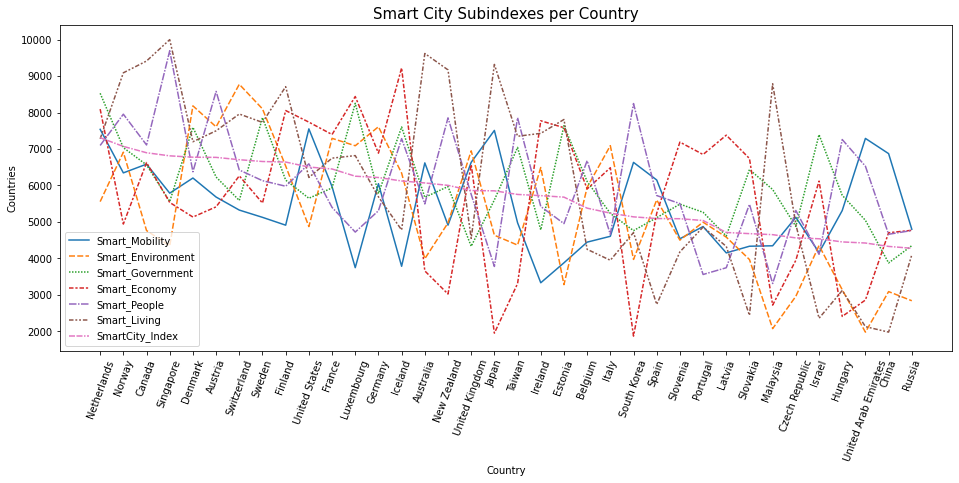

In [6]:
# Plotting Smart Cities Indexes 

plt.figure(figsize=(16,6))
sns.lineplot(data=scimean)
sns.set_style('whitegrid')
plt.ylabel('Countries', fontsize = 10) 
plt.title('Smart City Subindexes per Country', fontsize = 15)
ticks=plt.xticks(rotation=70)

In [7]:
# Let's look at the describtive statistics

sci.describe()

,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,5759.401961,5943.500000,5893.803922,6131.803922,5874.049020,6377.039216,5991.911765
std,1214.030137,1724.032171,1153.375297,1801.555148,1449.096341,2286.397477,852.775180
min,3175.000000,1850.000000,2806.000000,1490.000000,2825.000000,1980.000000,4191.000000
25%,4809.750000,4530.500000,5143.000000,5007.500000,4724.750000,4385.000000,5366.250000
50%,5651.500000,6495.000000,5911.000000,6432.500000,5747.500000,6485.000000,6261.500000
75%,6763.750000,7310.000000,6581.500000,7492.500000,7061.250000,8710.000000,6672.500000
max,8110.000000,8844.000000,8726.000000,9225.000000,9695.000000,10000.000000,7353.000000


Text(0.5, 1.0, 'Boxplot of Smart City Subindexes')

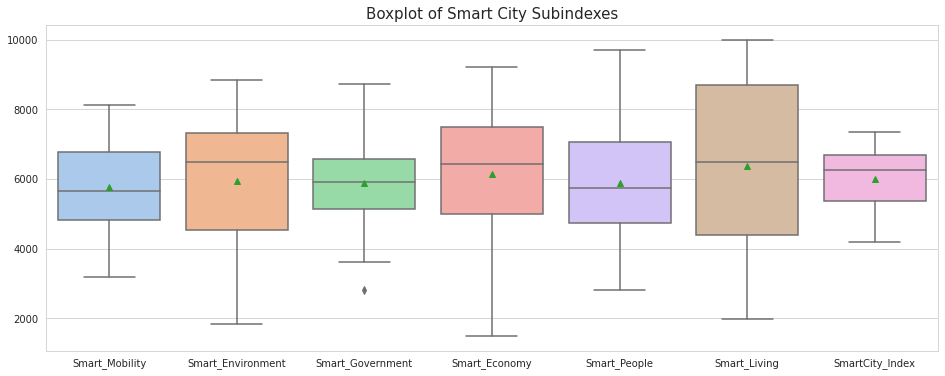

In [8]:
#Closer look at normal distribution patterns in a Boxplot.

plt.figure(figsize=(16,6))
sns.boxplot(data=sci, showmeans=True, palette='pastel')
sns.set_style('whitegrid')
plt.title('Boxplot of Smart City Subindexes', fontsize = 15)

**Comments:**

Here you can see that the Smart Living as well as Smart Environment indexes have the largest data dispersion, whereas the Smart Government the smallest. At the same time, distribution of data varies significantly.

Also the boxplot shows that the meadian and mean values does not match, that means that the distribution of values is not normal for most of the indexes.

With that in mind, I will use *Spearman method* to calculate correlations.

## Correlation between Smart Cities Indexes

Let's look at the correlation between all Smart City indexes to identify if there are some of them that potentially contribute more to the total smart city index.

array([[<AxesSubplot:title={'center':'Smart_Mobility'}>,
        <AxesSubplot:title={'center':'Smart_Environment'}>,
        <AxesSubplot:title={'center':'Smart_Government'}>],
       [<AxesSubplot:title={'center':'Smart_Economy'}>,
        <AxesSubplot:title={'center':'Smart_People'}>,
        <AxesSubplot:title={'center':'Smart_Living'}>],
       [<AxesSubplot:title={'center':'SmartCity_Index'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

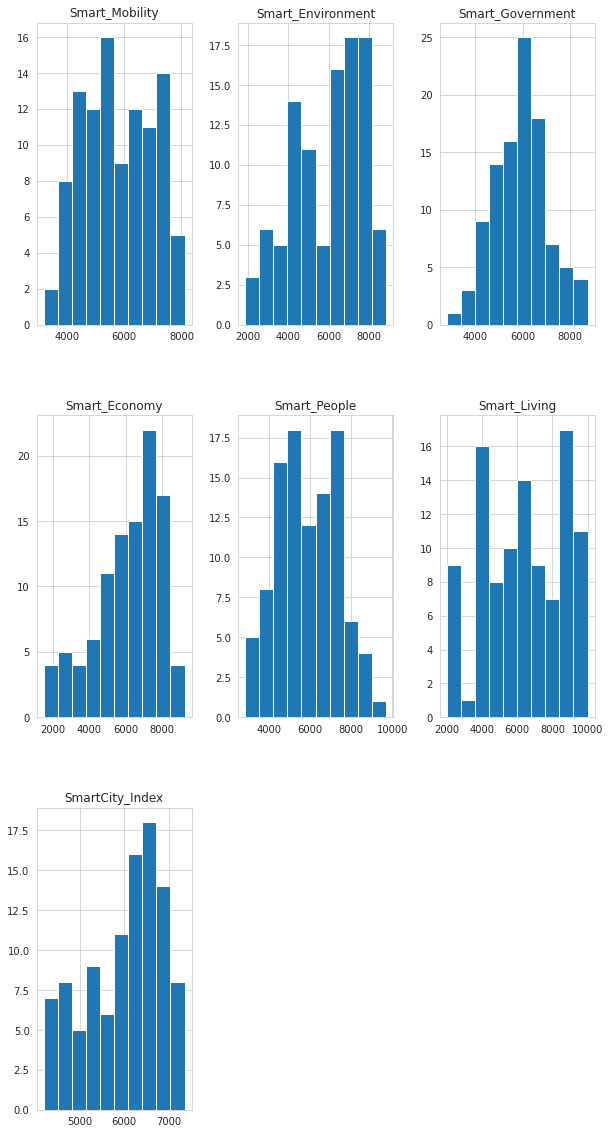

In [9]:
#Just to confirm this finding using the histogram representing the distribution of data.

sci.hist(figsize=(10, 20))

In [10]:
corr=sci.corr('spearman')
corrstyle=sci.corr('spearman').style.background_gradient(cmap="GnBu") #copy of the dataframe to avoid problems with Styler object 
corrstyle

,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index
Smart_Mobility,1.000000,-0.190717,-0.044086,-0.262643,0.350210,0.136172,0.344011
Smart_Environment,-0.190717,1.000000,0.277494,0.310629,-0.054533,0.042657,0.396496
Smart_Government,-0.044086,0.277494,1.000000,0.166121,0.260298,0.441402,0.595387
Smart_Economy,-0.262643,0.310629,0.166121,1.000000,-0.123954,0.054264,0.320630
Smart_People,0.350210,-0.054533,0.260298,-0.123954,1.000000,0.326242,0.556481
Smart_Living,0.136172,0.042657,0.441402,0.054264,0.326242,1.000000,0.723150
SmartCity_Index,0.344011,0.396496,0.595387,0.320630,0.556481,0.723150,1.000000


<Figure size 576x720 with 0 Axes>

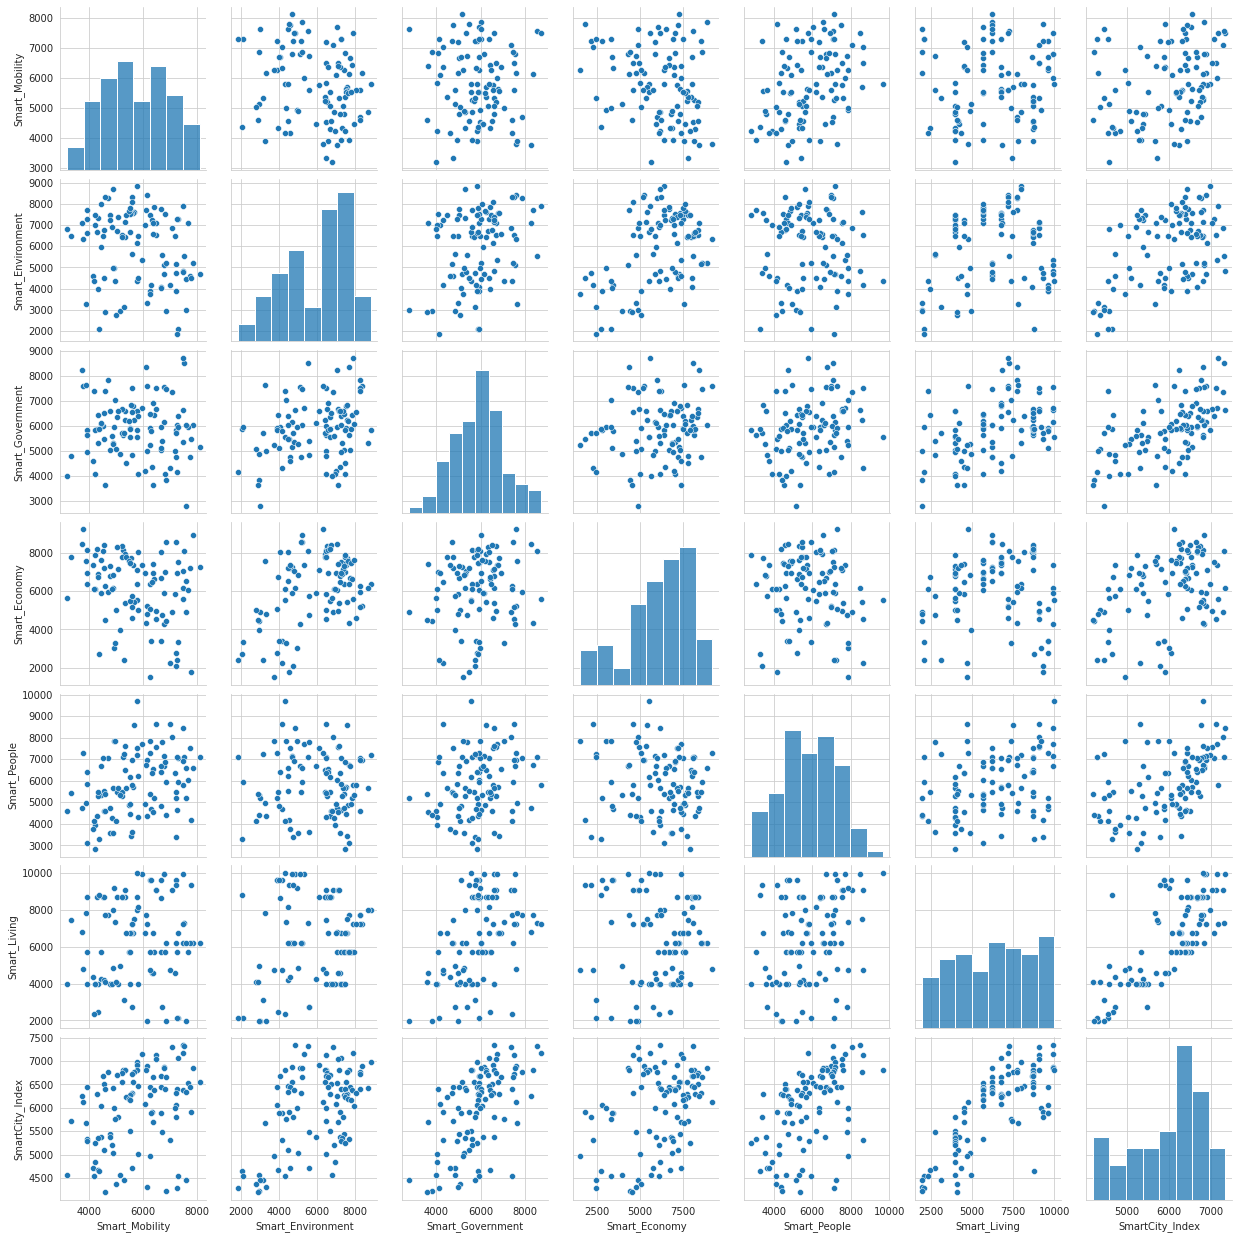

In [11]:
plt.figure(figsize=(8, 10))
sns.pairplot(sci, kind='scatter')
plt.show()

Calculating p-value for interpreting significance of correlations between the Smart City Index and its subindexes: Smart City Living, Smart City Government and Smart Cirty Environment. 

Smart Living correlation to Smart City Index
Spearman`s coefficient: 0.7231501163735866
p-value: 9.251159080050792e-18


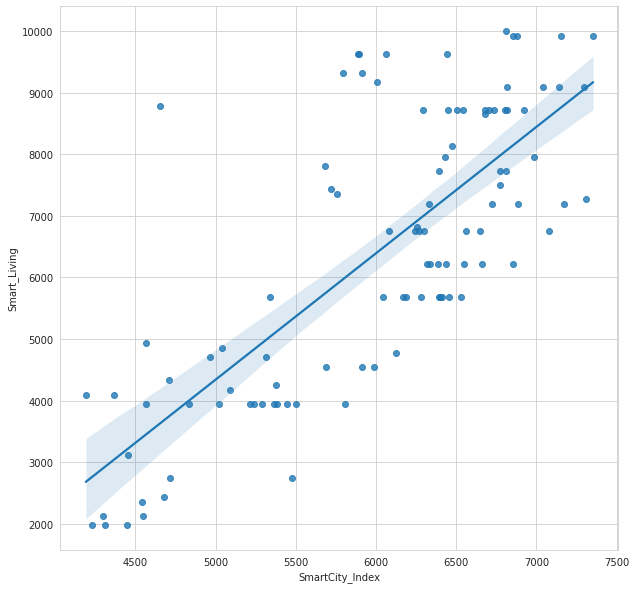

In [12]:
res= scipy.stats.spearmanr(sci['SmartCity_Index'], sci['Smart_Living'])
print('Smart Living correlation to Smart City Index')
print('Spearman`s coefficient:', res[0])
print('p-value:', res[1])

plt.figure(figsize=(10, 10))
sns.regplot(x=sci['SmartCity_Index'], y=sci['Smart_Living'])
plt.show()


Smart Government correlation to Smart City Index
Spearman`s coefficient: 0.5787091458811845
p-value: 1.8815483349685905e-10


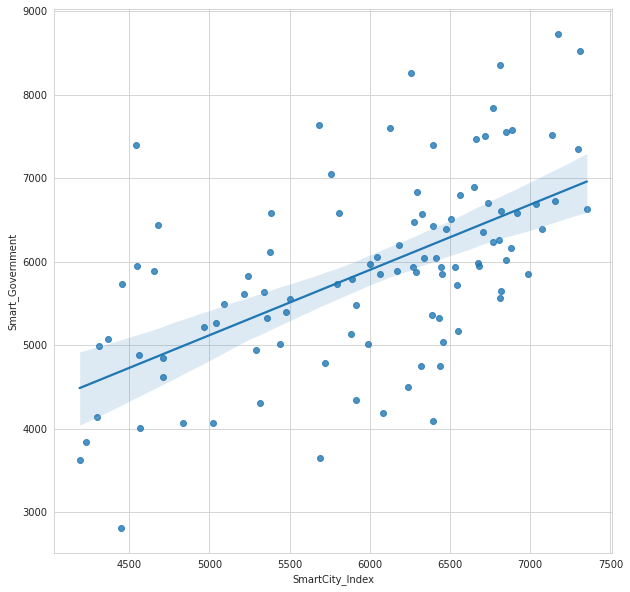

In [13]:
res= scipy.stats.pearsonr(sci['SmartCity_Index'], sci['Smart_Government'])
print('Smart Government correlation to Smart City Index')
print('Spearman`s coefficient:', res[0])
print('p-value:', res[1])


plt.figure(figsize=(10, 10))
sns.regplot(x=sci['SmartCity_Index'], y=sci['Smart_Government'])
plt.show()

Smart Environment correlation to Smart City Index
Spearman`s coefficient: 0.5048054872977699
p-value: 6.293049869388651e-08


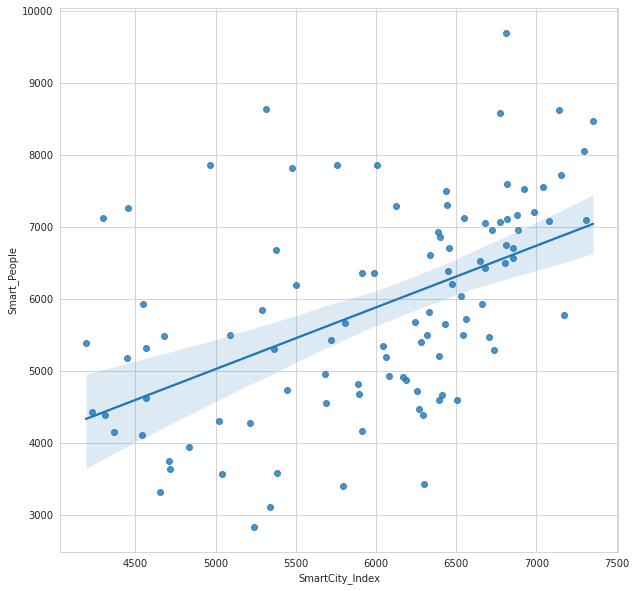

In [14]:
res= scipy.stats.pearsonr(sci['SmartCity_Index'], sci['Smart_People'])
print('Smart Environment correlation to Smart City Index')
print('Spearman`s coefficient:', res[0])
print('p-value:', res[1])

plt.figure(figsize=(10, 10))
sns.regplot(x=sci['SmartCity_Index'], y=sci['Smart_People'])
plt.show()

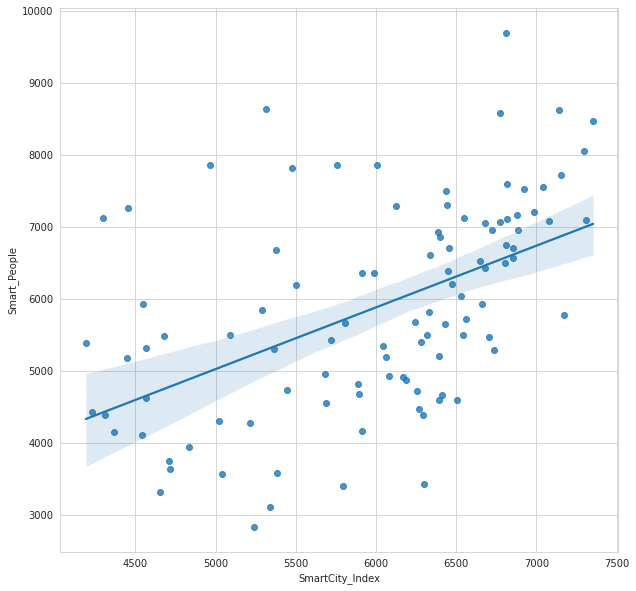

In [15]:
### Visualizing separately the correlation between the Smart City Index and its subindex Smart Living
plt.figure(figsize=(10, 10))
sns.regplot(x=sci['SmartCity_Index'], y=sci['Smart_People'])
plt.show()

## Insights from analysis for correlation 

First of all, smart city indexes data in the dataset hardly has normal distribution. 

From this dataframe with correlations of all indexes with each other we can see some interesting trends:

1. Smart City index has high and medium correlations with several subindexes: Smart Living (0.72), Smart People (0.59) and Smart Government(0.56). 
2. Subindexes has low correlation between each other, exceptions are the medium correlation (0.44) between Smart Government and Smar Living subindexes, as well as Smart People and Smart Mobility subindexes (0.35). 
3. High intercorrelation between subindexes has to be further explored to identify trends: whether indicators of those indexes have higher influence on the overall Smart City index value, or the assessment methodology should be reviesed.

More data analysis to follow in part 3 of the project. Stay tuned.
Thank you!
Luca

[Check out the part 1 of the project here](https://www.kaggle.com/code/olgashevtsova/smart-cities-part-1-population-and-smi-raiting). 